In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
from scipy.stats import sem
import scipy.stats as sts
from scipy.stats import linregress

In [2]:
csvpath = os.path.join("Data/GDP_v_satisfaction/gdp_vs_happiness.csv")
gdp_happy_df = pd.read_csv(csvpath)
gdp_happy_df.head()

,Entity,Code,Year,GDP per capita (constant 2011 international $),Life satisfaction (country average; 0-10) (Cantril Ladder (0=worst; 10=best)),Unnamed: 5
0,Afghanistan,AFG,1800,NaN,NaN,3280000.0
1,Afghanistan,AFG,1801,NaN,NaN,3280000.0
2,Afghanistan,AFG,1802,NaN,NaN,3280000.0
3,Afghanistan,AFG,1803,NaN,NaN,3280000.0
4,Afghanistan,AFG,1804,NaN,NaN,3280000.0


In [3]:
gdp_happy_clean = gdp_happy_df.dropna(how="any")
gdp_happy_clean

,Entity,Code,Year,GDP per capita (constant 2011 international $),Life satisfaction (country average; 0-10) (Cantril Ladder (0=worst; 10=best)),Unnamed: 5
208,Afghanistan,AFG,2008,1298.143159,3.723590,27722000.0
209,Afghanistan,AFG,2009,1531.173993,4.401778,28395000.0
210,Afghanistan,AFG,2010,1614.255001,4.758381,29186000.0
211,Afghanistan,AFG,2011,1660.739856,3.831719,30117000.0
212,Afghanistan,AFG,2012,1839.273579,3.782938,31161000.0
...,...,...,...,...,...,...
48113,Zimbabwe,ZWE,2013,1929.765001,4.690188,13350000.0
48114,Zimbabwe,ZWE,2014,1925.138698,4.184451,13587000.0
48115,Zimbabwe,ZWE,2015,1912.280261,3.703191,13815000.0
48116,Zimbabwe,ZWE,2016,1879.628119,3.735400,14030000.0


In [4]:
selected_countries = ["United States","Mexico","Venezuela","Brazil","South Africa","Nigeria","Poland","Sweden","Russia","China","South Korea","Australia"]
gdp_happy_select = gdp_happy_clean[gdp_happy_clean.Entity.isin(selected_countries)]
gdp_happy_select = gdp_happy_select.reset_index(drop=True)
del gdp_happy_select["Unnamed: 5"]

In [5]:
gdp_happy_select.columns=["Country","Code","Year","GDP","Life sat"]
gdp_happy_select

,Country,Code,Year,GDP,Life sat
0,Australia,AUS,2005,38928.040757,7.340688
1,Australia,AUS,2007,40680.189630,7.285391
2,Australia,AUS,2008,41331.527973,7.253757
3,Australia,AUS,2010,41464.040070,7.450047
4,Australia,AUS,2011,41894.173052,7.405616
...,...,...,...,...,...
132,Venezuela,VEN,2010,16544.972055,7.478455
133,Venezuela,VEN,2011,16981.335491,6.579789
134,Venezuela,VEN,2012,17678.812497,7.066577
135,Venezuela,VEN,2013,17665.239998,6.552796


In [8]:
gdp_happy_select_2010 = gdp_happy_select.loc[gdp_happy_select["Year"] == "2010"]
gdp_happy_select_2010

,Country,Code,Year,GDP,Life sat
3,Australia,AUS,2010,41464.040070,7.450047
15,Brazil,BRA,2010,14537.567193,6.837331
27,China,CHN,2010,9525.818483,4.652737
39,Mexico,MEX,2010,15715.972145,6.802389
51,Nigeria,NGA,2010,5150.158818,4.760276
60,Poland,POL,2010,21770.644436,5.887030
72,Russia,RUS,2010,23107.785221,5.384773
84,South Africa,ZAF,2010,11887.805034,4.652429
96,South Korea,KOR,2010,30352.104819,6.116024
108,Sweden,SWE,2010,42942.562503,7.496019


The r-squared is: 0.44240327220105785


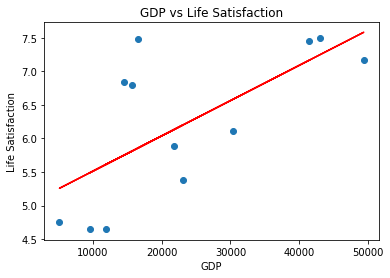

In [11]:
x_values = gdp_happy_select_2010["GDP"]
y_values = gdp_happy_select_2010["Life sat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("GDP vs Life Satisfaction")
plt.xlabel("GDP")
plt.ylabel("Life Satisfaction")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")